# **Import Libraries**

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [208]:
df = pd.read_csv('waste.csv')

# **Basic Operation**

## **>View Data**

In [209]:
df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1990,1990,kilotonnes,0.0,Fc,Calculated data
1,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1991,1991,kilotonnes,0.0,Fc,Calculated data
2,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1992,1992,kilotonnes,0.0,Fc,Calculated data
3,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1993,1993,kilotonnes,0.0,Fc,Calculated data
4,GW,Waste Disposal,AFG,Afghanistan,7273,Emissions (CO2),6990,Incineration,1994,1994,kilotonnes,0.0,Fc,Calculated data


## **>Check Shape**

In [210]:
rows, cols = df.shape
print("Number of Rows       = ", rows)
print("Number of Columns    = ", cols)

Number of Rows       =  6238
Number of Columns    =  14


## **>Data Info**

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       6238 non-null   object 
 1   Domain            6238 non-null   object 
 2   Area Code (ISO3)  6238 non-null   object 
 3   Area              6238 non-null   object 
 4   Element Code      6238 non-null   int64  
 5   Element           6238 non-null   object 
 6   Item Code         6238 non-null   int64  
 7   Item              6238 non-null   object 
 8   Year Code         6238 non-null   int64  
 9   Year              6238 non-null   int64  
 10  Unit              6238 non-null   object 
 11  Value             6238 non-null   float64
 12  Flag              6238 non-null   object 
 13  Flag Description  6238 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 682.4+ KB


# **Select Useful Data**

In [212]:
df= df[["Area", "Year", "Value"]]

In [213]:
df.head()

,Area,Year,Value
0,Afghanistan,1990,0.0
1,Afghanistan,1991,0.0
2,Afghanistan,1992,0.0
3,Afghanistan,1993,0.0
4,Afghanistan,1994,0.0


# **Check Null Values**

In [214]:
df.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

# **Find Outliers**

<AxesSubplot:ylabel='Value'>

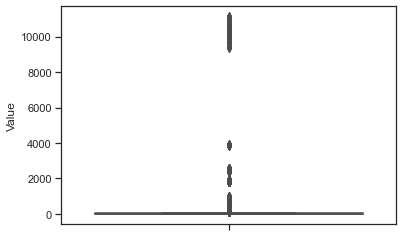

In [215]:
sns.boxplot(y="Value",data=df)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

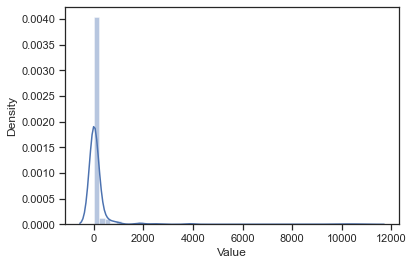

In [216]:
# Normalty test, Histogram, Bell curve to check data is normal or not..
sns.distplot(df["Value"])


In [217]:
df["Value"].mean()

202.6754669709843

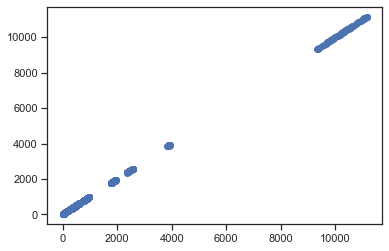

In [218]:
plt.scatter(x=df["Value"], y=df["Value"])

# **Remove Outliers**

In [219]:
Lower_Limit = df['Value'].quantile(0.05)
Lower_Limit

0.0

In [220]:
df[df['Value'] < Lower_Limit]

,Area,Year,Value


In [221]:
upperr_Limit = df['Value'].quantile(0.95)
upperr_Limit

624.4563293999997

In [222]:
df[df['Value'] > upperr_Limit]

,Area,Year,Value
1192,China,1990,9829.096328
1193,China,1991,9853.192064
1194,China,1992,9894.065577
1195,China,1993,9911.234135
1196,China,1994,9997.159768
...,...,...,...
5961,United States of America,2015,1936.825909
5962,United States of America,2016,1938.502248
5963,United States of America,2017,1941.087579
5964,United States of America,2018,1944.397062


In [223]:
df = df[(df["Value"] > Lower_Limit) & (df["Value"] < upperr_Limit)]
df

,Area,Year,Value
12,Afghanistan,2002,34.381732
13,Afghanistan,2003,34.548850
14,Afghanistan,2004,34.776162
15,Afghanistan,2005,35.043820
16,Afghanistan,2006,35.223750
...,...,...,...
6172,Yemen,2016,35.102289
6173,Yemen,2017,34.906703
6174,Yemen,2018,35.076427
6176,Yugoslav SFR,1990,36.051166


In [224]:
df.describe()

,Year,Value
count,3098.000000,3098.000000
mean,2004.953196,74.730972
std,8.462804,133.120881
min,1990.000000,0.017392
25%,1998.000000,3.470529
50%,2005.000000,20.734639
75%,2012.000000,67.473071
max,2019.000000,624.331308


In [225]:
Lower_Limit = df['Value'].quantile(0.05)
Lower_Limit
df[df['Value'] < Lower_Limit]

,Area,Year,Value
2530,Guyana,1990,0.044930
2531,Guyana,1991,0.044637
2532,Guyana,1992,0.044795
2533,Guyana,1993,0.045238
2534,Guyana,1994,0.045634
...,...,...,...
5367,Suriname,2015,0.019600
5368,Suriname,2016,0.019226
5369,Suriname,2017,0.019249
5370,Suriname,2018,0.019314


In [226]:
upperr_Limit = df['Value'].quantile(0.95)
upperr_Limit

426.72387209999977

In [227]:
df[df['Value'] > upperr_Limit]

,Area,Year,Value
1222,"China, Hong Kong SAR",1990,492.931817
1223,"China, Hong Kong SAR",1991,495.789351
1224,"China, Hong Kong SAR",1992,498.912592
1225,"China, Hong Kong SAR",1993,501.733267
1226,"China, Hong Kong SAR",1994,504.109501
...,...,...,...
4019,Netherlands,2015,588.940929
4020,Netherlands,2016,589.448538
4021,Netherlands,2017,590.788783
4022,Netherlands,2018,592.766045


In [228]:
df1 = df[(df["Value"] > Lower_Limit) & (df["Value"] < upperr_Limit)]
df1

,Area,Year,Value
12,Afghanistan,2002,34.381732
13,Afghanistan,2003,34.548850
14,Afghanistan,2004,34.776162
15,Afghanistan,2005,35.043820
16,Afghanistan,2006,35.223750
...,...,...,...
6172,Yemen,2016,35.102289
6173,Yemen,2017,34.906703
6174,Yemen,2018,35.076427
6176,Yugoslav SFR,1990,36.051166


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

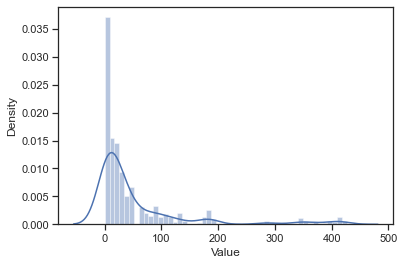

In [229]:
sns.distplot(df1["Value"])

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

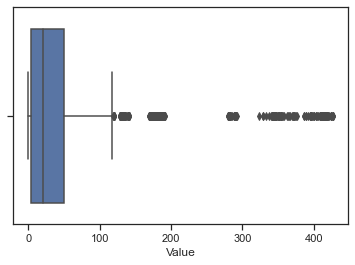

In [230]:
sns.boxplot(df1["Value"])

# **Group by Countries/Area**

In [231]:
a=df1.groupby(["Area"]).sum().sort_values(by="Value", ascending=False).head(30)
a

,Year,Value
Area,,
Philippines,60135,12091.522650
Viet Nam,60135,10617.204619
Switzerland,60135,10444.026732
Haiti,44011,9101.197844
Spain,60135,8589.147511
Cuba,39990,8320.262810
Jamaica,60135,5623.283884
Poland,60135,5505.052718
Austria,60135,5492.839576


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Philippines'),
  Text(1, 0, 'Viet Nam'),
  Text(2, 0, 'Switzerland'),
  Text(3, 0, 'Haiti'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Cuba'),
  Text(6, 0, 'Jamaica'),
  Text(7, 0, 'Poland'),
  Text(8, 0, 'Austria'),
  Text(9, 0, 'Greece'),
  Text(10, 0, 'Australia'),
  Text(11, 0, 'Mongolia'),
  Text(12, 0, 'Portugal'),
  Text(13, 0, 'Sweden'),
  Text(14, 0, 'Myanmar'),
  Text(15, 0, 'Saudi Arabia'),
  Text(16, 0, 'Singapore'),
  Text(17, 0, 'Trinidad and Tobago'),
  Text(18, 0, 'Belgium'),
  Text(19, 0, 'Republic of Moldova'),
  Text(20, 0, 'Pakistan'),
  Text(21, 0, 'Turkey'),
  Text(22, 0, 'Belarus'),
  Text(23, 0, 'Croatia'),
  Text(24, 0, 'Bangladesh'),
  Text(25, 0, 'Puerto Rico'),
  Text(26, 0, 'Belgium-Luxembourg'),
  Text(27, 0, 'United Arab Emirates'),
  Text(28, 0, 'Hungary'),
  Text(29, 0, 'Estonia')])

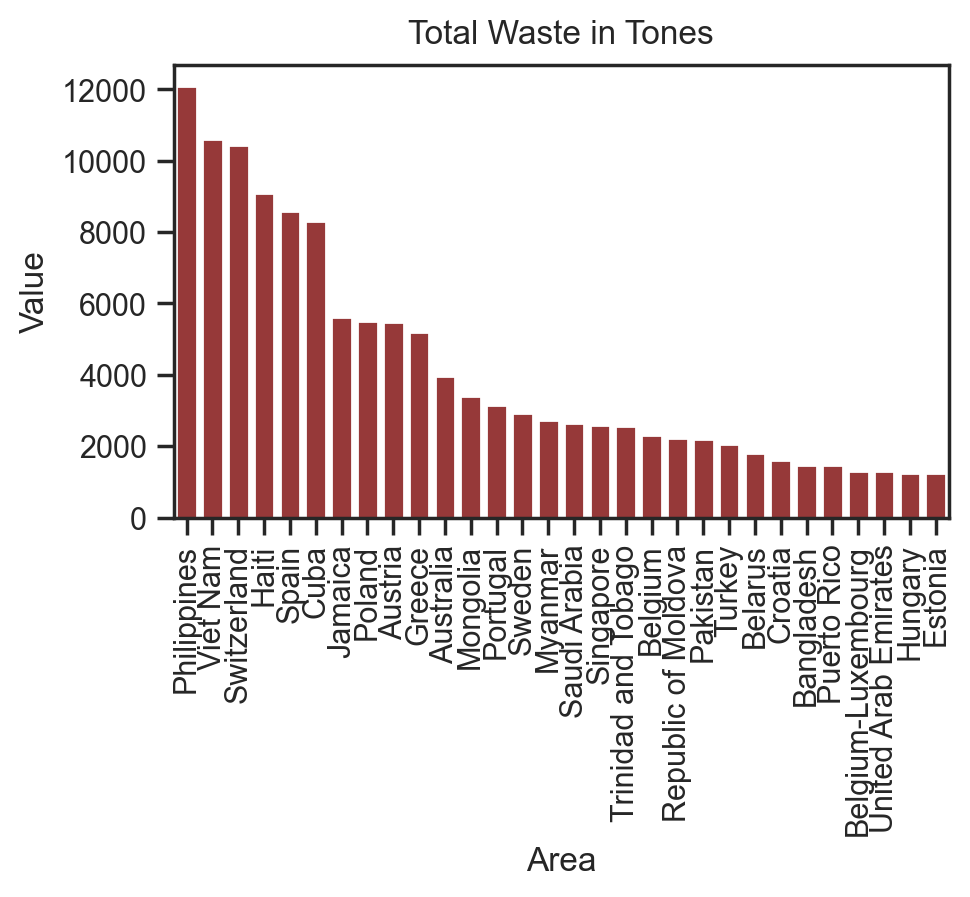

In [232]:
plt.figure(figsize=(5,3), dpi=200, linewidth=2)
sns.barplot(x=a.index,y='Value',data=a, color = 'brown')
plt.title("Total Waste in Tones", fontsize = 12, loc='center', y=1.01 )
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

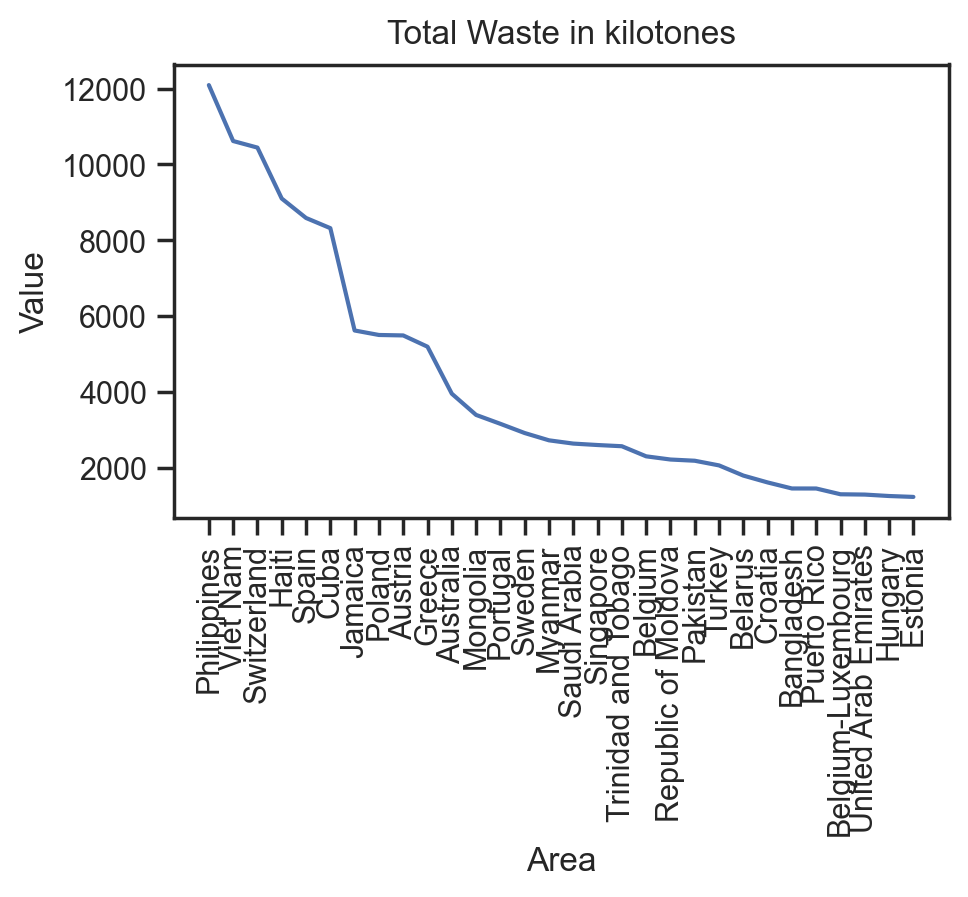

In [233]:
plt.figure(figsize=(5,3), dpi=200, linewidth=2)
sns.lineplot(x=a.index,y='Value',data=a)
plt.title("Total Waste in kilotones", fontsize = 12, loc='center', y=1.01  )
plt.xticks(rotation=90)

# **Group by Years**

In [234]:
a=df.groupby(["Year"]).sum().sort_values(by="Value", ascending=False).head(30)
a

,Value
Year,
2016,8324.842601
2015,8321.262315
2005,8142.537721
2004,8099.153032
2003,8012.685637
2002,7980.105272
2001,7903.858306
2000,7900.360217
1999,7747.142915


(array([1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

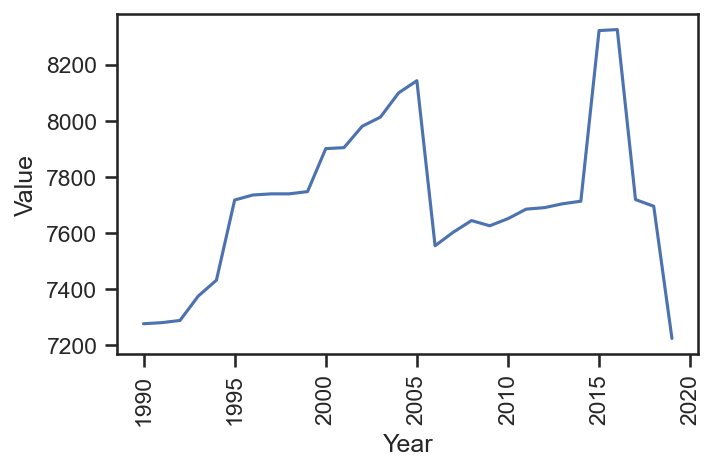

In [235]:
plt.figure(figsize=(5,3), dpi=150, linewidth=2)
sns.lineplot(x=a.index,y='Value',data=a)
plt.xticks(rotation=90)

In [236]:
df1.groupby("Area").sum().sort_values(by="Value", ascending=False).head(30)

,Year,Value
Area,,
Philippines,60135,12091.522650
Viet Nam,60135,10617.204619
Switzerland,60135,10444.026732
Haiti,44011,9101.197844
Spain,60135,8589.147511
Cuba,39990,8320.262810
Jamaica,60135,5623.283884
Poland,60135,5505.052718
Austria,60135,5492.839576


AttributeError: 'FacetGrid' object has no attribute 'head'

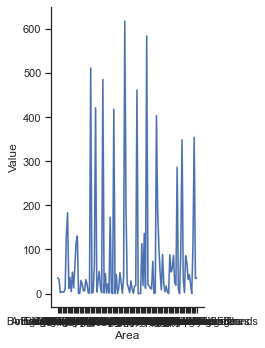

In [237]:
sns.set_theme(style="ticks")

palette = sns.color_palette("rocket_r")

sns.relplot(
    data=df,
    x="Area", y="Value",
    kind="line", size_order=["T1", "T2"],
    height=5, aspect=.75, facet_kws=dict(sharex=False),).head(30)

# plt.figure(figsize=(15,8), dpi=150)
# sns.scatterplot(x="Year",y="Value",hue="Area",data=df1)

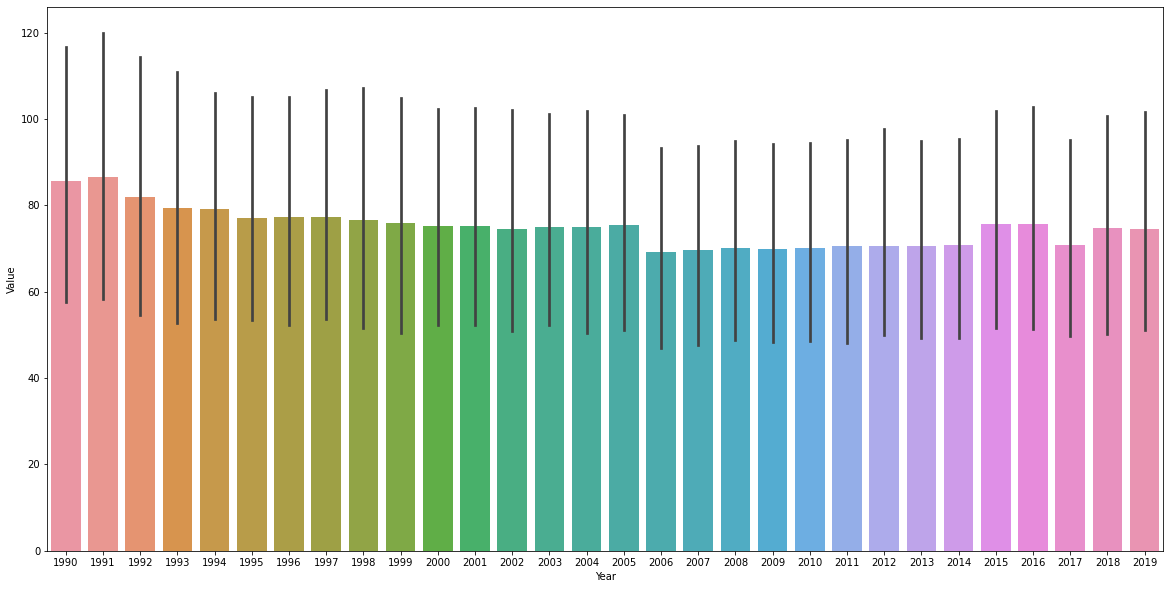

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x='Year', y='Value', data=df)
plt.show()

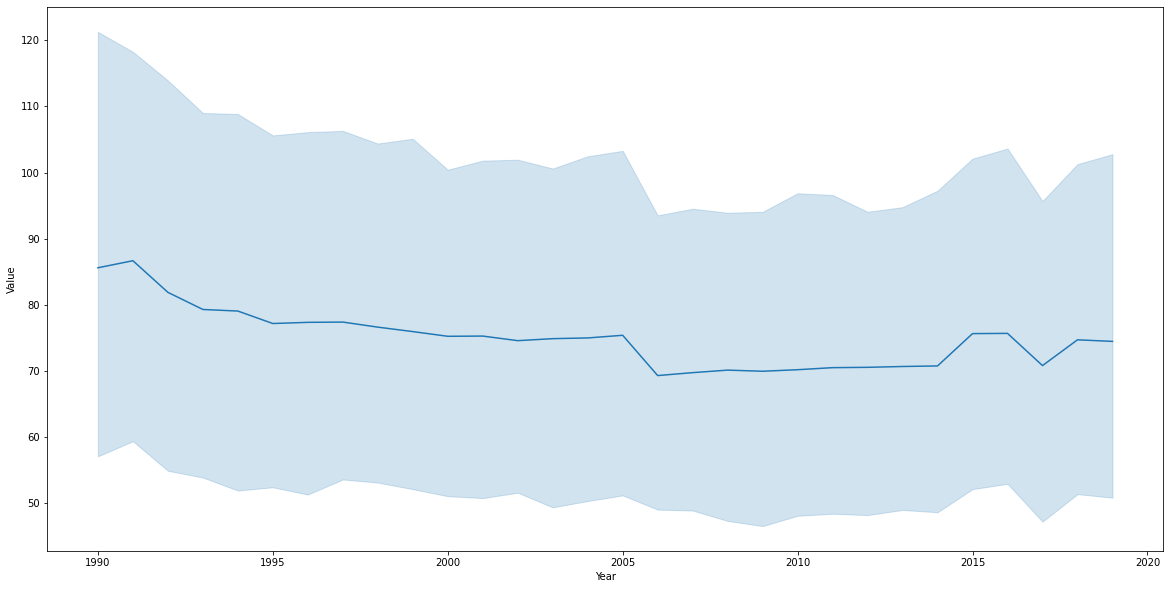

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(x='Year', y='Value', data=df)
plt.show()

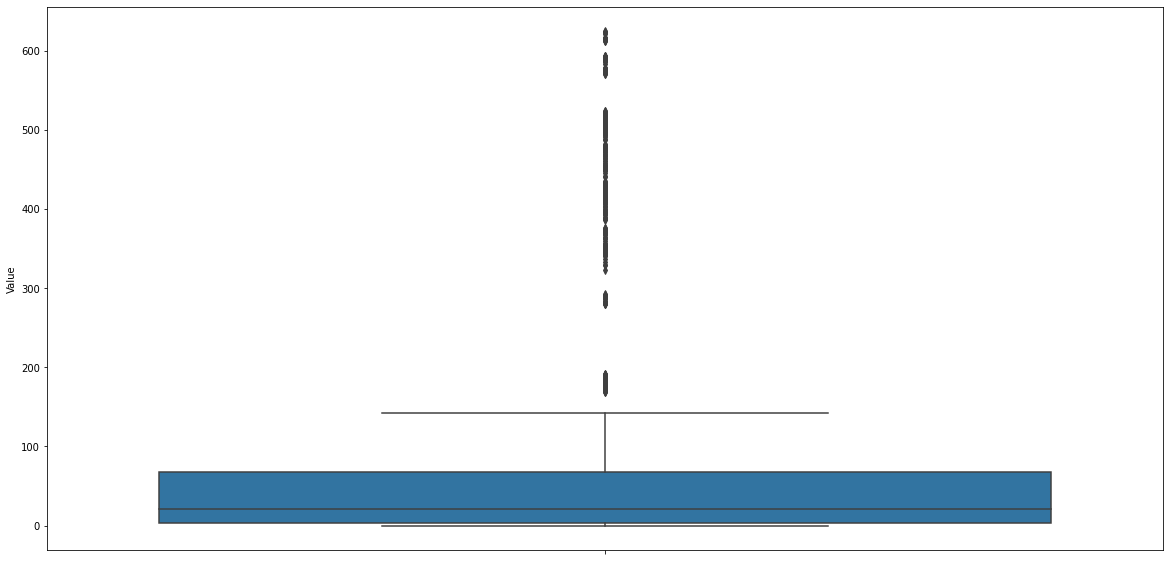

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(y='Value', data=df)
plt.show()

<AxesSubplot:xlabel='Year'>

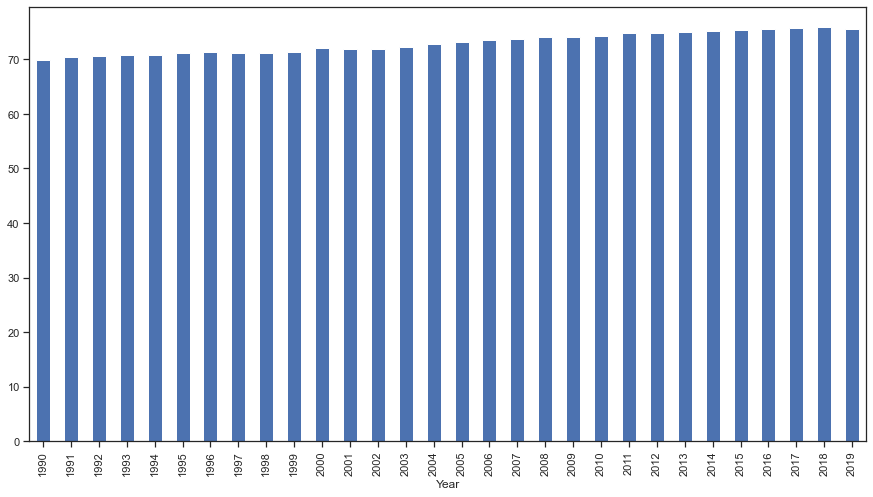

In [238]:
# Groupby Pakistan and Item and plot the mean
df1[df1["Area"]=="Pakistan"].groupby("Year")["Value"].mean().plot(kind="bar", figsize=(15,8))